In [1]:
import numpy as np
from pathlib import Path

alf = Path(r"E:\Aurelien\Data_Mice\VF071_2025_12_18\alf\probe00")

coords = np.load(alf / "channels.localCoordinates.npy")

print("Shape:", coords.shape)
print("Dtype:", coords.dtype)
print("First 10 rows:\n", coords[:10])
print("Min values:", coords.min(axis=0))
print("Max values:", coords.max(axis=0))


Shape: (384, 2)
Dtype: float32
First 10 rows:
 [[16.  0.]
 [48.  0.]
 [ 0. 20.]
 [32. 20.]
 [16. 40.]
 [48. 40.]
 [ 0. 60.]
 [32. 60.]
 [16. 80.]
 [48. 80.]]
Min values: [0. 0.]
Max values: [  48. 3820.]


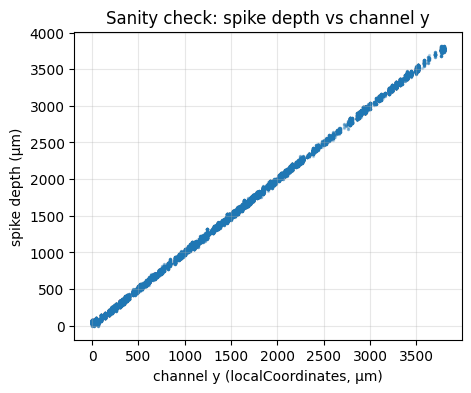

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

alf = Path(r"E:\Aurelien\Data_Mice\VF071_2025_12_18\alf\probe00")

coords = np.load(alf / "channels.localCoordinates.npy")
y_ch = coords[:, 1]

spike_depths = np.load(alf / "spikes.depths.npy")
spike_clusters = np.load(alf / "spikes.clusters.npy").astype(int)

# cluster -> channel mapping (support both filenames)
p1 = alf / "clusters.channels.npy"
p2 = alf / "clusters.channel.npy"

if p1.exists():
    cluster_ch = np.load(p1).astype(int)
elif p2.exists():
    cluster_ch = np.load(p2).astype(int)
else:
    raise FileNotFoundError("Missing clusters.channels.npy or clusters.channel.npy in alf folder")

# channel of each spike = channel of its cluster
spike_ch = cluster_ch[spike_clusters]

# subsample for speed
rng = np.random.default_rng(0)
n = len(spike_depths)
idx = rng.choice(n, size=min(30000, n), replace=False)

plt.figure(figsize=(5, 4))
plt.scatter(
    y_ch[spike_ch[idx]],
    spike_depths[idx],
    s=2,
    alpha=0.25
)
plt.xlabel("channel y (localCoordinates, µm)")
plt.ylabel("spike depth (µm)")
plt.title("Sanity check: spike depth vs channel y")
plt.grid(alpha=0.3)
plt.show()
